### Práctica de Web Scraping

Se va a considerar una página web de una tienda de internet: https://caorema.com

En la tienda se muestran diferentes objetos para comprar agrupados en 4 páginas. En cada página, cada objeto tiene asociada un conjunto de información: nombre, foto, descripción, precio, valoración y una etiqueta que indica si es una novedad o un top-ventas.

A continuación, se muestra una captura de la página

In [108]:
from IPython.display import Image
#Image(filename='Captura.png')

Se pide hacer un buscador que permita recuperar información de la página. Para ello se le mostrará al usuario 4 opciones entre las que tiene que elegir: Buscar por categoría, Buscar por etiqueta top-ventas o novedad, Buscar por precio o Buscar por descripción.

__Buscar por categoría__[2,5 puntos]

Si elige esta opción se le mostrará un listado con las 5 categorías de productos:Pulseras de Nudos, Collares de Cordón, Chakras y Energía Positiva,Bisutería y Collares Largos. Para facilitar la selección se asignará un número a cada categoria, de manera que el usuario elija por número.Una vez elegido una categoría, el programa mostrará una lista de todas las objetos que pertenecen a esa categoría (asignar un número a cada objeto para que sea más fácil elegir el objeto).  A continuación, el usuario elegirá un objeto y el programa deberá mostrar la siguiente información del mismo: nombre, foto, precio, puntuación, colores, etiqueta (Top-ventas o Novedad), Caracteristicas del producto y nombre de productos relacionados.

Por último, se le preguntará si quiere realizar otra búsqueda en cuyo caso se le mostrará nuevamente el menú con los objetos de la categoría seleccionada previamente para que pueda buscar nuevos objetos. Si no quiere buscar más, se saldrá de este menú , y se mostrará el menú principal.Nuevamente podrá buscar por otra opción o bien salir completamente del programa.

__Buscar por etiqueta top-ventas o novedad__[2,5 puntos]

Si elige esta opción se le mostrará un listado con 2 opciones:Top-ventas, y Novedad. Para facilitar la selección se asignará un número a cada etiqueta, de manera que el usuario elija por número.Una vez elegido una etiqueta, el programa mostrará una lista de todas las objetos que tienen asociada esa etiqueta (asignar un número a cada objeto para que sea más fácil elegir el objeto).  A continuación, el usuario elegirá un objeto y el programa deberá mostrar la siguiente información del mismo: nombre, foto, precio, puntuación, colores, etiqueta (Top-ventas o Novedad), Caracteristicas del producto y nombre de productos relacionados.

Por último, se le preguntará si quiere realizar otra búsqueda en cuyo caso se le mostrará nuevamente el menú con los objetos de la etiqueta seleccionada previamente para que pueda buscar nuevos objetos. Si no quiere buscar más, se saldrá de este menú , y se mostrará el menú principal.Nuevamente podrá buscar por otra opción o bien salir completamente del programa.

__Buscar por precio__[2,5 puntos]

Si elige esta opción se le mostrará una caja de texto donde se le pregunte cuánto desea gastarse, de manera que el usuario introducirá una precio (puede ser un númeror decimal). El programa mostrára un listado con todos los objetos cuyo precio es igual o menor al dado (se muestra el nombre del objeteo y el precio), de manera que el usuario pueda seleccionar uno de los objetos para ver más información. Para facilitar la selección se asignará un número a cada objeto, de manera que el usuario elija por número.Una vez elegido un objeto, el programa deberá mostrar la siguiente información del mismo: nombre, foto, precio, puntuación, colores, etiqueta (Top-ventas o Novedad), Caracteristicas del producto y nombre de productos relacionados.

Por último, se le preguntará si quiere realizar otra búsqueda en cuyo caso se le mostrará nuevamente el menú con los objetos recuperados previamente para que pueda buscar nuevos objetos. Si no quiere buscar más, se saldrá de este menú ,y se mostrará el menú principal.Nuevamente podrá buscar por otra opción o bien salir completamente del programa.

__Buscar por descripción__[2,5 puntos]

Si elige esta opción se le mostrará una caja de texto donde el usuario deberá introducir una o más palabras clave. El programa mostrára un listado con todos los objetos en los que alguna de las palabras clave introducidas por el usuario aparezcan en los textos sobre las características de producto, de manera que el usuario pueda seleccionar uno de los objetos para ver más información. Para facilitar la selección se asignará un número a cada objeto, de manera que el usuario elija por número.Una vez elegido un objeto, el programa deberá mostrar la siguiente información del mismo: nombre, foto, precio, puntuación, colores, etiqueta (Top-ventas o Novedad), Caracteristicas del producto y productos relacionados.

Por último, se le preguntará si quiere realizar otra búsqueda en cuyo caso se le mostrará nuevamente el menú con los objetos recuperados previamente para que pueda buscar nuevos objetos. Si no quiere buscar más, se saldrá de este menú ,y se mostrará el menú principal.Nuevamente podrá buscar por otra opción o bien salir completamente del programa.

Para hacer  los ejercicios, tened en cuenta:

* En primer lugar, analizar la página donde se va recuperar la información, y buscar donde se encuentra la información que se necesita. Por ejemplo para el primer menú se analiza la página principal del sitio y se puede observar que la información que se busca está al principio de la página tal como se ve en la captura

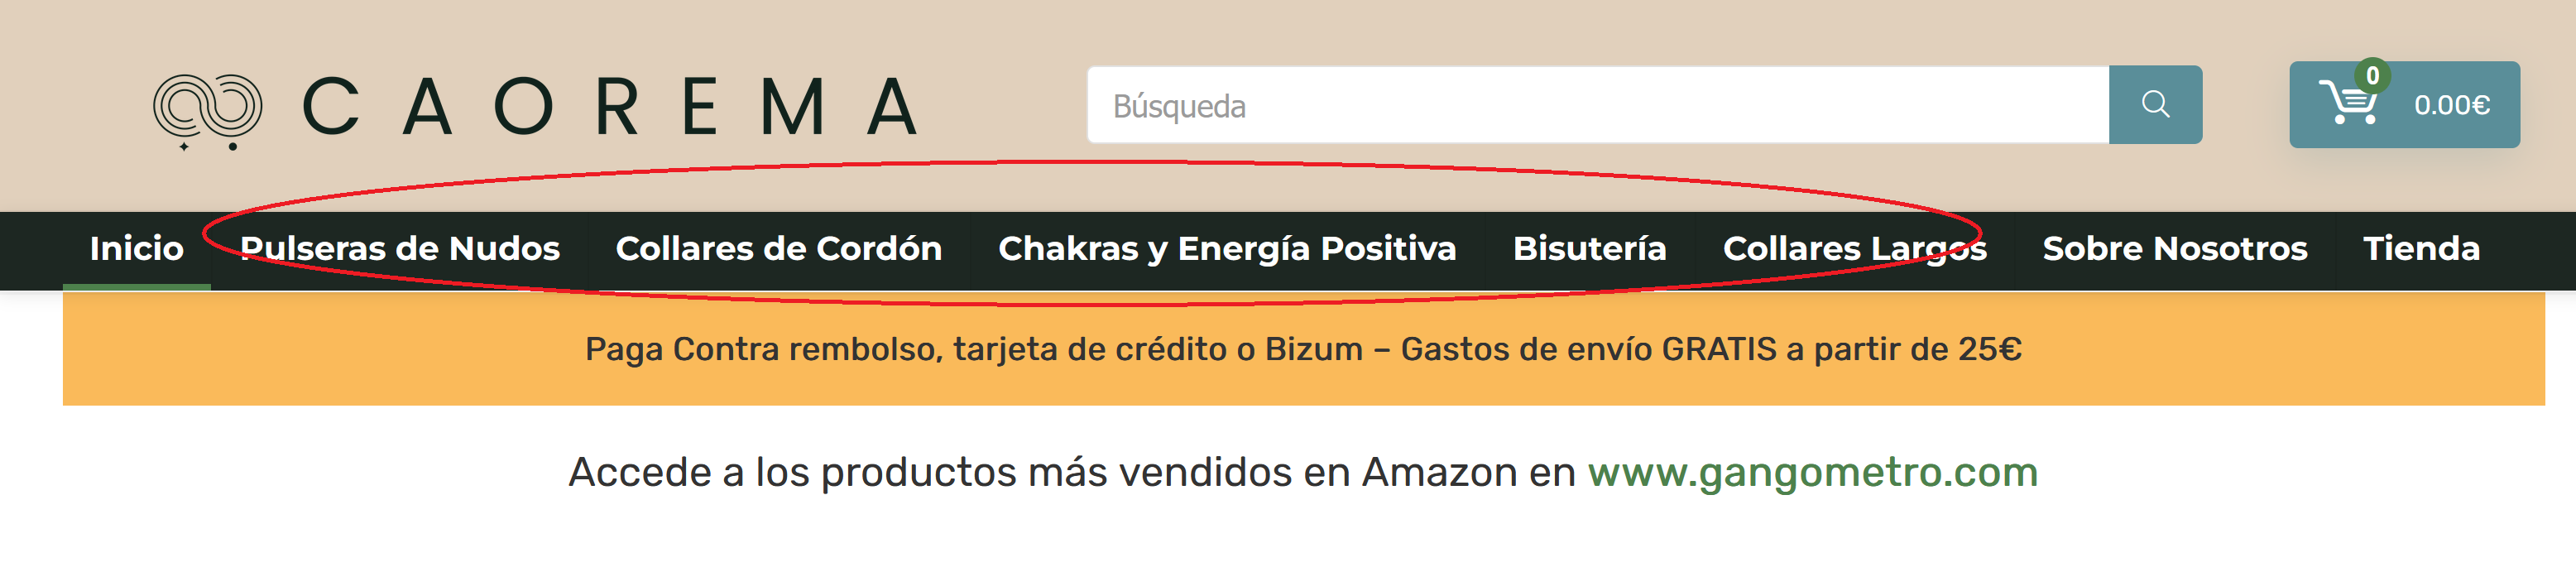

In [2]:
from IPython.display import Image
Image(filename='Captura2.png')

* A continuación, hay que analizar el código fuente de la página web para caracterizar donde se encuentra lo que se está buscando. Siguiendo con el ejemplo, se abriría el código fuente de la página principal y se debe buscar donde aparecen los enlaces que se ven en la visualización del html de la página principal. Localizada la información se debe que caracterizar en términos de etiquetas html que es lo que caracteriza a la información buscado. En este ejemplo, se puede comprobar que que los enlaces se encuentran dentro de la etiqueta "</nav class="top_menu">"  la cual es única en toda la página. 

In [2]:
from IPython.display import Image
#Image(filename='Captura3.png')

* A continuación se puede usar BeautifulSoup para recuperar ese trozo de código, recuperar la información que se desee,y usarla para lo que sea necesario. Se puede observar que los enlaces a las páginas se encuentran en las anclas dentro de las etiquetas "li".

In [103]:
import urllib
from bs4 import BeautifulSoup
import pprint
from IPython.display import Image
from IPython.display import display


#etiqueta=soup("nav")
#print (etiqueta)

In [104]:
htmlInicio = urllib.request.urlopen("https://caorema.com/").read()
soup = BeautifulSoup(htmlInicio, 'html.parser')

In [105]:
def showDetallesProducto(soupProd):
    nombre = soupProd.find(attrs={'class':'product_title'}).text
    img = soupProd.find(attrs={'class':'wp-post-image'}).get('src')
    precio = soupProd.find(attrs={'class':'woo-price-area mb10'}).p.span.bdi.text
    puntuacion = soupProd.find(attrs={'class':'score-compact'})
    puntuacion = puntuacion.text if puntuacion else None
    colores = soupProd.find(attrs={'class':'variable-items-wrapper button-variable-items-wrapper wvs-style-squared'})
    colores = colores.get('data-attribute_values') if colores else None
    etiqueta = soupProd.find(attrs={'class':'re_wooinner_title_compact flowhidden'})
    etiqueta = etiqueta.span.span.text if etiqueta.span else None
    descripcion = soupProd.find(attrs={'class':'woocommerce-product-details__short-description'}).p.text
    prodRelacionados = [h3.a.text for h3 in soupProd.find(attrs={'class':'products'}).findAll('h3')]

    
    print('Nombre:', nombre)
    print('Precio:', precio)
    print('Puntuacion:', puntuacion)
    print('Colores:', colores)
    print('Etiqueta:', etiqueta)
    print('Descripcion:', descripcion)
    print('Productos relacionados:', prodRelacionados)
    display(Image(url=img, width=200))

In [106]:
def buscarPorCategoria(soup):
    # --- Menu Categorias ---
    nav = soup.find("nav")
    lis = nav.findAll("li")[1:6]
    categorias = [li.text for li in lis]

    otraVez = True
    while otraVez:
        print('\nElige una categoria:')
        i = 0
        for cat in categorias:
            print(i, cat)
            i+=1

        catElegida = int(input('Introduce el numero asociado a la categoria:'))

        urlCat = lis[catElegida].a.get('href')


        # --- Menu Productos ---
        htmlCat=urllib.request.urlopen(urlCat).read()
        soupCat=BeautifulSoup(htmlCat, 'html.parser')

        lisProductos = soupCat.find(attrs={'class':'wc-block-grid__products'}).findAll('li')

        print('\nElige un producto:')
        i=0
        for li in lisProductos:
            print(i, li.a.text[2:-1])
            i+=1

        prodElegido = int(input('Introduce el numero asociado al producto:'))

        urlProd = lisProductos[prodElegido].a.get('href')


        # --- Informacion Producto ---
        htmlProd=urllib.request.urlopen(urlProd).read()
        soupProd=BeautifulSoup(htmlProd, 'html.parser')

        print()
        showDetallesProducto(soupProd)


        # --- Menu otra vez ---
        print('\nQuieres hacer otra busqueda? (0 - NO, 1 - SI)')
        otraVez = int(input('(0 - NO, 1 - SI)'))

In [ ]:
def buscarPorEtiqueta(soup):
    # --- Menu etiquetas ---
    etiquetas = ['Top Ventas','Novedad']
    
    otraVez = True
    while(otraVez):
        print('Elige una etiqueta:')
        i = 0
        for e in etiquetas:
            print(i, e)
            i+=1
        

        etiquetaElegida = etiquetas[int(input('Introduce el numero asociado a la etiqueta:'))]


        nav = soup.find("nav")
        urlTienda = nav.find("li", attrs={'id':'menu-item-1755'}).a.get('href')

        htmlTienda = urllib.request.urlopen(urlTienda).read()
        soupTienda = BeautifulSoup(htmlTienda, 'html.parser')

        categoryLinks = [div.a.get('href') for div in soupTienda.find(attrs={'class':'products_category_box'})]


        # --- Menu productos ---
        productsDivs = []
        for link in categoryLinks:
            htmlCat = urllib.request.urlopen(link).read()
            soupCat = BeautifulSoup(htmlCat, 'html.parser')

            for div in soupCat.find(attrs={'class':'products'}).findAll(attrs={'class':'product'}):
                if div.span.span.text == etiquetaElegida:
                    productsDivs.append(div)

        print('\nElige un producto')
        i = 0
        for p in productsDivs:
            print(i, p.h3.a.text)
            i+=1

        prodElegido = productsDivs[int(input('Introduce el numero asociado al producto:'))]


        # --- Mostrar info producto ---
        htmlProd = urllib.request.urlopen(prodElegido.h3.a.get('href')).read()
        soupProd = BeautifulSoup(htmlProd, 'html.parser')

        print()
        showDetallesProducto(soupProd)


        # --- Menu otra vez ---
        print('\nQuieres hacer otra busqueda? (0 - NO, 1 - SI)')
        otraVez = int(input('(0 - NO, 1 - SI)'))

In [ ]:
def buscarPorPrecio(soup):
    # --- Menu Precio ---
    precioGastar = float(input("Escribe la cantidad que deseas gastarte: "))
    
    otraVez = True
    while otraVez:
        print('\nElige un producto:')
        
        nav = soup.find("nav")
        urlTienda = nav.find("li", attrs={'id':'menu-item-1755'}).a.get('href')

        htmlTienda = urllib.request.urlopen(urlTienda).read()
        soupTienda = BeautifulSoup(htmlTienda, 'html.parser')

        categoryLinks = [div.a.get('href') for div in soupTienda.find(attrs={'class':'products_category_box'})]

        # --- Menu productos ---
        productsDivs = []
        for link in categoryLinks:
            htmlCat = urllib.request.urlopen(link).read()
            soupCat = BeautifulSoup(htmlCat, 'html.parser')

            for div in soupCat.find(attrs={'class':'products'}).findAll(attrs={'class':'product'}):
                if float(div.find(attrs={'class': 'woocommerce-Price-amount amount'}).text[:-1]) <= precioGastar:
                    productsDivs.append(div)
        
        i = 0
        for p in productsDivs:
            print(i, p.h3.a.text, p.find(attrs={'class': 'woocommerce-Price-amount amount'}).text)
            i+=1

        prodElegido = int(input('Introduce el numero asociado al producto:'))

        urlProd = productsDivs[prodElegido].a.get('href')

        # --- Informacion Producto ---
        htmlProd=urllib.request.urlopen(urlProd).read()
        soupProd=BeautifulSoup(htmlProd, 'html.parser')

        print()
        showDetallesProducto(soupProd)

        # --- Menu otra vez ---
        print('\nQuieres hacer otra busqueda? (0 - NO, 1 - SI)')
        otraVez = int(input('(0 - NO, 1 - SI)'))

In [ ]:
def buscarPorDescripcion(soup):
# --- Menu Precio ---
    palabrasBuscar = input("Escribe las palabras que deseas buscar: ")
    
    otraVez = True
    while otraVez:
        print('\nElige un producto:')
        
        nav = soup.find("nav")
        urlTienda = nav.find("li", attrs={'id':'menu-item-1755'}).a.get('href')

        htmlTienda = urllib.request.urlopen(urlTienda).read()
        soupTienda = BeautifulSoup(htmlTienda, 'html.parser')

        categoryLinks = [div.a.get('href') for div in soupTienda.find(attrs={'class':'products_category_box'})]

        # --- Menu productos ---
        productsDivs = []
        for link in categoryLinks:
            htmlCat = urllib.request.urlopen(link).read()
            soupCat = BeautifulSoup(htmlCat, 'html.parser')

            for div in soupCat.find(attrs={'class':'products'}).findAll(attrs={'class':'product'}):
                link = div.a.get('href')
                htmlProd=urllib.request.urlopen(link).read()
                soupProd=BeautifulSoup(htmlProd, 'html.parser')
                desc = soupProd.find(attrs={'class':'woocommerce-product-details__short-description'})
                if(desc != None):
                    arrayPalabras = palabrasBuscar.split(" ")
                    for i in arrayPalabras:
                        if(i in (desc.p.text)):
                            productsDivs.append(div)
                            break
        
        i = 0
        for p in productsDivs:
            print(i, p.h3.a.text, p.find(attrs={'class': 'woocommerce-Price-amount amount'}).text)
            i+=1

        prodElegido = int(input('Introduce el numero asociado al producto:'))

        urlProd = productsDivs[prodElegido].a.get('href')

        # --- Informacion Producto ---
        htmlProd=urllib.request.urlopen(urlProd).read()
        soupProd=BeautifulSoup(htmlProd, 'html.parser')

        print()
        showDetallesProducto(soupProd)

        # --- Menu otra vez ---
        print('\nQuieres hacer otra busqueda? (0 - NO, 1 - SI)')
        otraVez = int(input('(0 - NO, 1 - SI)'))

In [ ]:
buscarPorDescripcion(soup)

In [107]:
buscarPorCategoria(soup)


Elige una categoria:
0 Pulseras de Nudos
1 Collares de Cordón
2 Chakras y Energía Positiva
3 Bisutería
4 Collares Largos
Introduce el numero asociado a la categoria:2

Elige un producto:
0 Pulsera Mal de Ojo con Mano de Fátima y Ojo Turco
1 Juego de Piedras Naturales de los 7 Chakras
2 Collar con Colgante de los 7 Chakras Circular
3 Collar con Colgante de los 7 Chakras Redondo
4 Collar con Colgante de los 7 Chakras Alargado
5 Collar con Colgante de los 7 Chakras en Cruz
6 Pulsera de los 7 Chakras Elástica
7 Collar con Colgante de los 7 chakras sobre Estrella de David
Introduce el numero asociado al producto:5

Nombre: Collar con Colgante de los 7 Chakras en Cruz
Precio: 11.90€
Puntuacion: 9.7
Colores: None
Etiqueta: Novedad
Descripcion: Collar con colgante en forma de cruz de los 7 Chakras. Es ideal para todo tipo de personas. Los 7 chakras de nuestro cuerpo son 7 puntos energéticos a través de los que canalizamos nuestra energía. Estos puntos se reparten formando una columna desde el


Quieres hacer otra busqueda? (0 - NO, 1 - SI)
(0 - NO, 1 - SI)0


buscarPorEtiqueta(soup)

In [ ]:
buscarPorPrecio(soup)

__Nota: Para realizar los procesamientos es obligatorio utilizar la libreria BeautifulSoup. No se pueden usar otras librerías__

# Normas de entrega

* Fecha tope de entrega: 20/10/2022
* La entrega se realizará subiendo al campus virtual un notebook de Jupyter con la solución. El archivo tendrá como nombre WebScraping_GrupoX donde X será el número de grupo correspondiente.
